# Demo 6: Algorithms02

## Define Geometry

In [1]:
from tigre.geometry import TIGREParameters
geo=TIGREParameters(high_quality=False)

## Load data and generate projections

In [2]:
import numpy as np
from _Ax import Ax
from Test_data import data_loader
# define angles
angles=np.linspace(0,2*np.pi,dtype=np.float32)
# load head phantom data
head=data_loader.load_head_phantom(number_of_voxels=geo.nVoxel)
# generate projections
projections=Ax(head,geo,angles,'interpolated')

## SART family of algorithms

In [3]:
# Optional arguments for all of them
#==========================================================================
# 'lmbda': hyperparameter. The update will be multiplied by this number
# every iteration, to make the steps bigger or smaller. Default: 1

lmbda=1;


#'lmbdared': reduction multiplier for the hyperparameter.
# lmbda=lmbda*lmbdared every iterations, so the steps can be smaller
# the further the update. Default=0.99
lmbdared=0.999;

# 'Init' : Initialization method. Possible options are
#          'none' (default). There will be no initialization method, just
#                 the algorithm
  
#          'FDK'  Initialize the image with the result of FDK algorithm

#          'multigrid' Initialize using the multigrid method. The image
#                      will be solved in a small scale, and the size of it
#                      will increase until the desired size is reached.
#
#          'image'     Initialzies with a user given image. Not recoomended
#                      unless you really know what you are doing.

init=None;

#'InitImg' : related to init. The image to use for initializing the
# algorithm.

# 'verbose': boolean to make the algorithm display (or not) running state. 
#            default true.

verbose=True;
# 'QualMeas'     Asks the algorithm for a set of quality measurement
#                parameters. Input should contain a cell array of desired
#                quality measurement names. Example: {'CC','RMSE','MSSIM'}
#                These will be computed in each iteration. 
QualMeas='RMSE';
# OS-SART
# ========================================================================
# Additionally OS-SART includes a couple of other parameters, related to
# the subsets.
#
#   'blocksize':   Sets the projection block size used simultaneously. If
#                  BlockSize = 1 OS-SART becomes SART and if  BlockSize = length(angles)
#                  then OS-SART becomes SIRT. Default is 20.

# EXAMPLES:
# ----------------------------------------------------------------------
from tigre.Algorithms.OS_SART import OS_SART
from tigre.Algorithms.SIRT import SIRT
from tigre.Algorithms.SART import SART
from tigre.Utilities.plotImg import plotImg
iterations=50
sirt,sirt_l2err=SIRT(projections,geo,angles,iterations,computel2=True)
ossart,ossarterr=OS_SART(projections,geo,angles,iterations,blocksize=20,computel2=True)
sart,sarterr=SART(projections,geo,angles,iterations,computel2=True)


SIRT algorithm in progress.
Esitmated time until completetion (s): 1.76545
OS_SART algorithm in progress.
Esitmated time until completetion (s): 14.4661
SART algorithm in progress.
Esitmated time until completetion (s): 41.368103


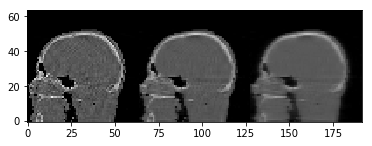

<tigre.Utilities.plotImg.plotImg instance at 0x7f1c9d8efc20>

In [4]:
from tigre.Utilities.plotImg import plotImg
plotImg(np.hstack((sart,ossart,sirt)),slice=32,dim='z')

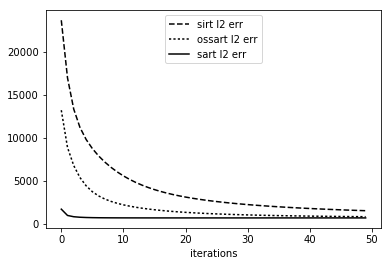

In [5]:
from matplotlib import pyplot as plt
xx=np.arange(iterations)
fig, ax = plt.subplots()
ax.plot(xx, sirt_l2err, 'k--', label='sirt l2 err')
ax.plot(xx, ossarterr, 'k:', label='ossart l2 err')
ax.plot(xx, sarterr, 'k', label='sart l2 err')
plt.xlabel('iterations')
legend = ax.legend(loc='upper center')
plt.show()